# Support Vector Machine

<img src='s1.png' />

In [ ]:
Real worlds examples

- image classification -> face recognition or objection
- OCR(Optical Charater Recognition)
- bioinformatics - gene classification, protien structure prediction
- speech recognition

For Images and OCR - 
https://pyimagesearch.com/

## When to use SVM

In [ ]:
- Binary classification
- small or medium size dataset
- high dimensional data
- linear and non-linear 

## Hyperplane, Margin, Support Vector

<img src='s2.png' />


## Margin and Hyperplane to choose

<img src='s3.png' />

In [ ]:
2 steps to search for the maximum margin hyperplane

- generate hyperplane which segregate the classes in a best possible way.
  the best hyperplane should represents the largest separation or margin b/w the two classes.
    
- maximum margin hyperplane -> maximum margin classifier

## Kernel Trick


<img src='s4.png' />

In [ ]:
kernel tricks (function that maps the data to a higher dimension)

- Linear Kernel - when you have linear seperable dataset
- polynomial kernel - when the decision boundary is a polynomial(curved plane or line)
go for polynomial kernel in NLP problems

- Radial Basis Function(rbf) / gaussian kernel - use when you have no prior knowledge of data
  non-linear data with complex decision boundaries
  more flexible than the polynomial

- sigmoid kernel - the data has sigmoidal decision boundary

# Dataset Pulsar

#### predicting a pulsar star

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.shape

(12528, 9)

In [4]:
col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd',
             'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class' ]

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [8]:
df.target_class.value_counts()  # class imbalance

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          9273 non-null   float64
 1   IP Sd            9273 non-null   float64
 2   IP Kurtosis      9273 non-null   float64
 3   IP Skewness      9273 non-null   float64
 4   DM-SNR Mean      9273 non-null   float64
 5   DM-SNR Sd        9273 non-null   float64
 6   DM-SNR Kurtosis  9273 non-null   float64
 7   DM-SNR Skewness  9273 non-null   float64
 8   target_class     9273 non-null   float64
dtypes: float64(9)
memory usage: 724.5 KB


In [12]:
df.target_class.value_counts()  # class imbalance

0.0    8423
1.0     850
Name: target_class, dtype: int64

In [13]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [14]:
df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'DM-SNR Skewness')

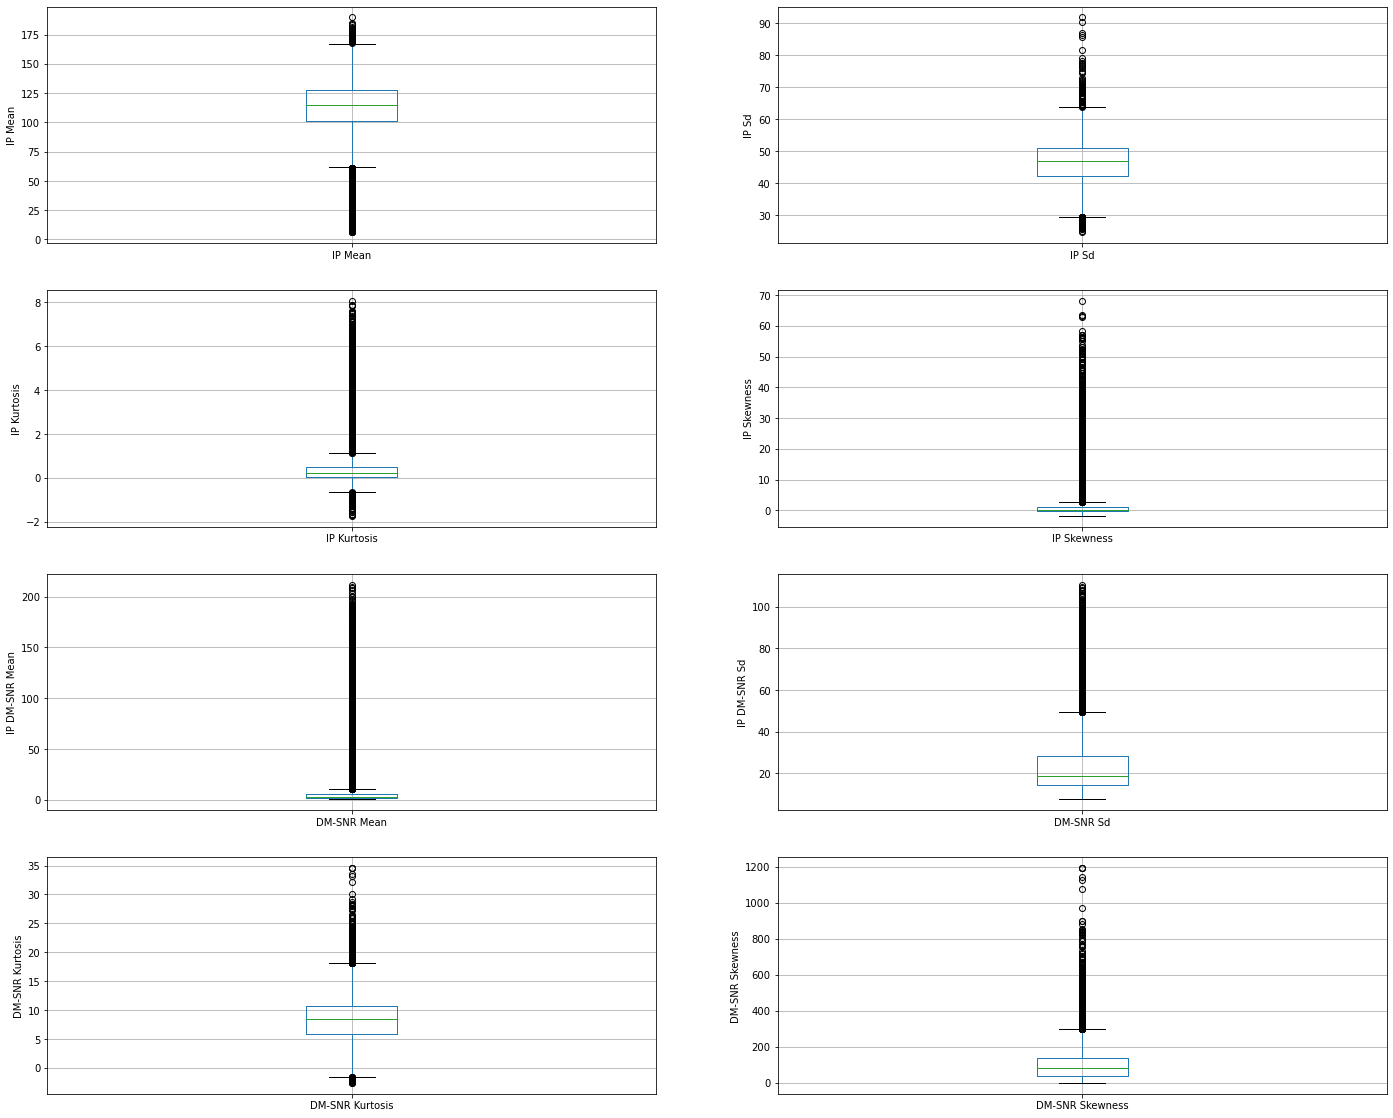

In [18]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4,2,2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4,2,3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4,2,4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4,2,5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('IP DM-SNR Mean')

plt.subplot(4,2,6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('IP DM-SNR Sd')

plt.subplot(4,2,7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4,2,8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')



In [ ]:
# how to handle outliers wiht SVM


- 2 variants

1 - hard-margin - does not deal with outliers


2 - soft-margin - good with outliers
  - for every data point that is classified with less margin
  - add a penalty in the form of C parameter

low C  - allowing more outliers
high C - allowing less outliers

In [19]:
# features

x = df.drop(['target_class'], axis=1)

y = df['target_class']

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
cols = xtrain.columns

In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)

xtest = scaler.transform(xtest)

In [24]:
xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

In [25]:
xtrain.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03
mean,1.518811e-16,2.761077e-16,1.154674e-17,-5.567578e-18,-7.623242e-17,-6.794840e-18,8.588121e-17,-2.425339e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-4.062595e+00,-3.195114e+00,-2.039801e+00,-5.630418e-01,-4.201420e-01,-9.704665e-01,-2.413736e+00,-9.966851e-01
25%,-3.886562e-01,-6.095197e-01,-4.225747e-01,-3.146418e-01,-3.626540e-01,-6.104157e-01,-5.597244e-01,-6.548497e-01
50%,1.634366e-01,6.559767e-02,-2.410595e-01,-2.543538e-01,-3.327143e-01,-4.046059e-01,2.075082e-02,-2.092757e-01
75%,6.275847e-01,6.658203e-01,-1.245402e-02,-1.410595e-01,-2.422847e-01,1.101465e-01,5.199843e-01,3.063228e-01
max,2.870438e+00,5.964328e+00,6.785511e+00,9.540137e+00,6.768125e+00,4.336626e+00,5.744530e+00,9.966367e+00


# SVC classifier

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [27]:
svc = SVC()

svc.fit(xtrain, ytrain)

ypred = svc.predict(xtest)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
accuracy_score(ytest, ypred)

0.9730458221024259

In [29]:
# c = 100 and kernel = rbf

svc = SVC(C=100.0)

svc.fit(xtrain, ytrain)

ypred = svc.predict(xtest)

print(accuracy_score(ytest, ypred))

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9762803234501348


C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
# c = 1000 and kernel = rbf

svc = SVC(C=1000.0)

svc.fit(xtrain, ytrain)

ypred = svc.predict(xtest)

print(accuracy_score(ytest, ypred))

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9752021563342318


C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
# c = 1 and kernel = linear

linear_svc = SVC(kernel='linear' ,C=1.0)

linear_svc.fit(xtrain, ytrain)

ypred = linear_svc.predict(xtest)

print(accuracy_score(ytest, ypred))

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9746630727762803


In [32]:
# c = 100 and kernel = linear

linear_svc = SVC(kernel='linear' ,C=100.0)

linear_svc.fit(xtrain, ytrain)

ypred = linear_svc.predict(xtest)

print(accuracy_score(ytest, ypred))

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9746630727762803


C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
# c = 1000 and kernel = linear

linear_svc = SVC(kernel='linear' ,C=1000.0)

linear_svc.fit(xtrain, ytrain)

ypred = linear_svc.predict(xtest)

print(accuracy_score(ytest, ypred))

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9746630727762803


C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# Assignment

- polynomial kernel
- sigmoid kernel

compare the train and test results

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)

array([[1671,   13],
       [  34,  137]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1684
         1.0       0.91      0.80      0.85       171

    accuracy                           0.97      1855
   macro avg       0.95      0.90      0.92      1855
weighted avg       0.97      0.97      0.97      1855



In [37]:
# classification error

cm = confusion_matrix(ytest, ypred)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_error = (FP + FN)/ (TP + TN + FP + FN)

print(classification_error)

0.025336927223719677
